# Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

# [Step 1] Importing Data

In [2]:
# Creating a path
path = r'C:\Users\duongxma\Dropbox\CareerFoundry - Data Analytics\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
# Import orders_products_merged.pkl
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_new.pkl'))

# [Step 2]

In [4]:
ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


# [Step 3]

In [5]:
# The results are noticeably different. For one, there's more departments included than in the subset, which means there's 
# more rows that aren't fully displayed in the output above due to the default limits set. Second, the mean / average for the
# departments are different from the subset since there are now more values to calculate. For example, in the subset, dept 4
# had a mean of 18.8; in the entire dataframe, dept 4 has a mean of 17.8. 

# [Step 4]

In [6]:
ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [7]:
ords_prods_merge.head(15)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10
5,3367565,1,prior,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10
7,3108588,1,prior,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10
8,2295261,1,prior,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10
9,2550362,1,prior,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10


In [8]:
ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [9]:
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [10]:
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [11]:
ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [12]:
ords_prods_merge.head(15)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,77,7,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer
6,550135,1,prior,7,1,9,20.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer


# [Step 5]

In [13]:
# Descriptive statistics for the purchasing habits of the customer loyalty type

ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max', 'sum']})

prices                           
                       mean  min      max          sum
loyalty_flag                                          
Loyal customer    10.386336  1.0  99999.0  106814042.2
New customer      13.294670  1.0  99999.0   83011787.2
Regular customer  12.495717  1.0  99999.0  198391693.2

In [14]:
# There is a clear difference between the purchasing habits between loyal, regular, and new customers. I think it makes sense
# that regular customers spent the most money (sum) out of the three categories since there's more of them in the dataframe, 
# followed by loyal customers, then new customers. New customers spending more on average compared to loyal and regular
# customers may be an indication of their ability to scoop out deals and coupons compared to a new customer who may not know
# all the "tricks" in saving money yet on the app. Regular and loyal customers may know when a price is too high or low, so 
# they make purchases accordingly while a new customer may just purchase an item without considering price changes over time. 
# Regular and loyal customers also may be purchasing produce and everyday essentials that may not cost as much compared to a 
# new customer who may be using it to purchase bigger items once in a while. For example, buying tomatoes every other week is
# spending a little amount frequently versus buying a propane tank / more expensive item one time over the past six months. 

# [Step 6]

In [15]:
ords_prods_merge['avg_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

In [16]:
ords_prods_merge.loc[ords_prods_merge['avg_price'] >= 10, 'spending_flag'] = 'High spender'

In [17]:
ords_prods_merge.loc[ords_prods_merge['avg_price'] < 10, 'spending_flag'] = 'Low spender'

In [18]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender
2,473747,1,prior,3,3,12,21.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender
4,431534,1,prior,5,4,15,28.0,196,1,1,...,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender


In [19]:
# See how many are in the spending_flag column / category

ords_prods_merge['spending_flag'].value_counts(dropna = False)

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

# [Step 7]

In [20]:
ords_prods_merge['median_freq'] = ords_prods_merge.groupby(['user_id'])['days_since_last_order'].transform(np.median)

In [21]:
ords_prods_merge.loc[ords_prods_merge['median_freq'] > 20, 'order_freq_flag'] = 'Non-frequent customer'

In [22]:
ords_prods_merge.loc[(ords_prods_merge['median_freq'] > 10) & (ords_prods_merge['median_freq'] <= 20), 'order_freq_flag'] = 'Regular customer'

In [23]:
ords_prods_merge.loc[ords_prods_merge['median_freq'] <= 10, 'order_freq_flag'] = 'Frequent customer'

In [24]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [25]:
# See how many records are in each of the order_freq_flag column / category

ords_prods_merge['order_freq_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: order_freq_flag, dtype: int64

In [26]:
ords_prods_merge.shape

(32404859, 25)

In [27]:
# Filter out the records that have NaN in the order_freq_flag column

df_nan = ords_prods_merge[ords_prods_merge['order_freq_flag'].isnull() == True]

In [28]:
df_nan

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
13645692,895835,159838,prior,1,0,17,NaN,10749,3,0,...,NaN,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
17251990,895835,159838,prior,1,0,17,NaN,33401,6,0,...,NaN,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
17622767,895835,159838,prior,1,0,17,NaN,23695,2,0,...,Low-range product,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
24138593,895835,159838,prior,1,0,17,NaN,21334,5,0,...,NaN,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
25880002,895835,159838,prior,1,0,17,NaN,22198,1,0,...,Low-range product,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN


In [29]:
# It makes sense why the order_freq_flag is coming back as NaN since the median_freq is also NaN, so it doesn't fit in any of
# the criteria mentioned above. 

# Creating Subset

In [30]:
# Create subset

df = ords_prods_merge[:1000000]

In [31]:
df.shape

(1000000, 25)

In [32]:
df.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# Grouping Data with pandas

In [33]:
# [From Lesson] "This is because the output of the groupby() function isn’t visible. Though it executed successfully 
# (as evidenced by the output message you received), it’s not something that you, as the coder, can actually see."

df.groupby('product_name')

# Aggregating Data with agg()

In [34]:
df.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
4,18.825780
7,17.472355
13,17.993423
14,19.246334
16,19.463012
17,11.294069
19,19.305237
20,17.599636


In [35]:
df.groupby('department_id')['order_number'].mean()

department_id
4     18.825780
7     17.472355
13    17.993423
14    19.246334
16    19.463012
17    11.294069
19    19.305237
20    17.599636
Name: order_number, dtype: float64

In [36]:
# Performing multiple aggregations

df.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
4                18.825780   1  99
7                17.472355   1  99
13               17.993423   1  99
14               19.246334   1  99
16               19.463012   1  99
17               11.294069   1  98
19               19.305237   1  99
20               17.599636   1  99

# Aggregating Data with transform()

In [37]:
ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [38]:
ords_prods_merge.head(15)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [39]:
ords_prods_merge.head(100)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3226575,360,prior,1,5,12,NaN,196,1,0,...,Mid-range product,Regularly busy,Regular days,Most orders,3,New customer,10.006250,High spender,4.0,Frequent customer
96,1469869,377,prior,3,5,17,3.0,196,9,0,...,Mid-range product,Regularly busy,Regular days,Average orders,3,New customer,8.496552,Low spender,16.5,Regular customer
97,1927023,387,prior,2,4,10,22.0,196,3,0,...,Mid-range product,Least busy,Slowest days,Most orders,8,New customer,7.396610,Low spender,8.0,Frequent customer
98,858092,420,prior,4,1,19,30.0,196,2,0,...,Mid-range product,Regularly busy,Busiest days,Average orders,22,Regular customer,7.387805,Low spender,7.0,Frequent customer


# Deriving Columns with loc()

In [40]:
ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [41]:
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [42]:
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [43]:
ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [44]:
ords_prods_merge[['user_id', 'loyalty_flag', 'order_number']].head(60)

,user_id,loyalty_flag,order_number
0,1,New customer,1
1,1,New customer,2
2,1,New customer,3
3,1,New customer,4
4,1,New customer,5
5,1,New customer,6
6,1,New customer,7
7,1,New customer,8
8,1,New customer,9
9,1,New customer,10


# [New] Visualization: Comparing Customer Loyalty & Their Order Frequency

In [45]:
loyalty_orders_ct = pd.crosstab(df['loyalty_flag'], df['order_freq_flag'], dropna = False)

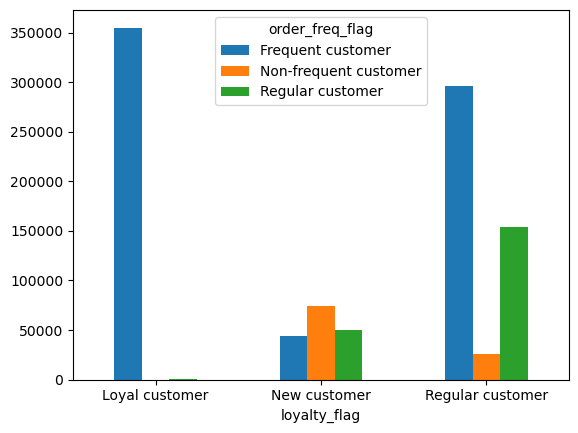

In [46]:
bar_loyalty_orders = loyalty_orders_ct.plot.bar(rot=0)

In [47]:
bar_loyalty_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_orders_bar.png'))